In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from detectors.IKS import IKS
from detectors.IBDD import IBDD
from detectors.WRS import WRS
import warnings
warnings.filterwarnings("ignore")

In [2]:
#path_test = "C:/Users/luiz_/Projects/DataStreams/DataStreams-Quantification/datasets/test"
#path_train = "C:/Users/luiz_/Projects/DataStreams/DataStreams-Quantification/datasets/training"
path_test = "C:/Users/Luiz Fernando/Projects/DataStreams-Quantification/datasets/test"
path_train = "C:/Users/Luiz Fernando/Projects/DataStreams-Quantification/datasets/training"

files_test = os.listdir(path_test)
datasets = [file.split(".")[0] for file in files_test]
files_test = [pd.read_csv(f"{path_test}/{f}") for f in files_test]

files_train = os.listdir(path_train)
files_train = [pd.read_csv(f"{path_train}/{f}") for f in files_train]
print(datasets)

['AedesQuinx', 'AedesSex', 'Arabic-digit', 'wine']


In [3]:
print(files_test)

[             wbf      eh_1      eh_2      eh_3      eh_4      eh_5      eh_6  \
0     474.193548  0.178585  0.172441  0.043769  0.265499  0.068176  0.128343   
1     506.896552  0.218450  0.218481  0.027408  0.432591  0.176818  0.229486   
2     565.384615  0.034858  0.058285  0.173607  0.036100  0.377893  0.048056   
3     558.227848  0.070814  0.146803  0.364292  0.064749  0.678501  0.100370   
4     558.227848  0.109654  0.195359  0.340204  0.092397  0.624805  0.127890   
...          ...       ...       ...       ...       ...       ...       ...   
3995  436.633663  0.351219  0.316821  0.280244  0.291517  0.355871  0.153607   
3996  436.633663  1.389803  1.347412  0.671559  1.361457  0.613862  0.397510   
3997  501.136364  0.370440  0.379923  0.139380  0.993764  0.257972  0.697455   
3998  495.505618  0.495138  0.495532  0.056246  1.565005  0.193768  1.099718   
3999  506.896552  0.226639  0.228782  0.062082  0.318494  0.206956  0.128963   

          eh_7      eh_8      eh_9  ..

In [4]:
clf = RandomForestClassifier(n_estimators=200)

In [5]:
table = pd.DataFrame()
window_size = 11#window parameter to build the images for comparison
t = 5988
table

""


dataset: AedesQuinx
Example 5989/6000 drifts: []
Example 5990/6000 drifts: []
Example 5991/6000 drifts: []
Example 5992/6000 drifts: []
Example 5993/6000 drifts: []
Example 5994/6000 drifts: []
Example 5995/6000 drifts: []
Example 5996/6000 drifts: []
Example 5997/6000 drifts: []
Example 5998/6000 drifts: []
Example 5999/6000 drifts: []
[1.0]
{'CC': 0.64, 'ACC': 1, 'MS': 0.83, 'DyS': 0.0}
proportion:0.64 /// thr:0.5, score:[0.58]
proportion:1 /// thr:0.105, score:[0.58]
proportion:0.83 /// thr:0.38, score:[0.58]
proportion:0.0 /// thr:0.73, score:[0.58]
    IKS  IKS-CC  IKS-ACC  IKS-MS  IKS-DyS  real
0     1       1        1       1        1     0
1     1       1        1       1        1     0
2     1       1        1       1        1     0
3     1       1        1       1        1     0
4     1       1        1       1        1     0
5     1       1        1       1        1     0
6     1       1        1       1        1     0
7     0       0        0       0        0     0
8     0 

KeyboardInterrupt: 

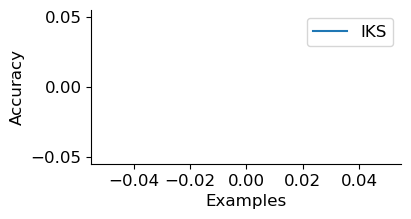

In [6]:
for i, files in enumerate(zip(files_train, files_test)):
    contexts = files[1].iloc[:, -1]
    stream = pd.concat([files[0], files[1]], ignore_index=True)
    stream = stream.iloc[:, :-1]
    stream.iloc[:, -1].replace(2, int(0), inplace=True)

    print(f"dataset: {datasets[i]}")
    
    threshold = 0.001
    wrs = WRS(stream, t, window_size, clf, contexts, threshold)
    accs = wrs.runslidingwindow()
    table = pd.concat([table, pd.DataFrame([accs.mean().to_dict()])])
    print(table)

    epsilon = 3
    ibdd = IBDD(stream, t, window_size, clf, contexts, epsilon)
    accs = ibdd.runslidingwindow()
    table = pd.concat([table, pd.DataFrame([accs.mean().to_dict()])])
    print(table)
    
    
    threshold = 1.90
    iks = IKS(stream, t, window_size, clf, contexts, threshold)
    accs = iks.runslidingwindow()
    table = pd.concat([table, pd.DataFrame([accs.mean().to_dict()])])
    print(table)
    
table["datasets"] = datasets
print(table)
    
     
    